In [9]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)

data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,opt_policy_index,optimal_outcome_policy
0,1444.313726,1536.365612,1256.443526,89,1998.791827,56,1784.011133
1,1631.947826,1572.387613,1204.851445,34,2058.885241,56,1710.928517
2,1846.346909,1784.138946,1574.870211,75,2129.102026,56,1838.274756
3,1699.589602,1737.452100,1414.375624,75,2094.317976,56,1732.295106
4,1604.939189,1536.232563,976.085574,55,1740.223833,56,1460.205042
5,1637.052457,1541.872426,1185.798487,75,2102.129326,56,1732.240964
6,1615.495063,1716.439536,1406.231410,18,2154.255243,56,1656.481441
7,1811.013201,1623.410859,1028.076318,75,2012.254473,56,1734.791289
8,1984.917696,1800.082571,1509.312189,75,2276.138419,56,1857.112627
9,1943.795998,1710.448118,1308.175443,75,1922.749072,56,1479.370921


In [10]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy', "opt_policy_index"]:
        data[f'regret_{column}'] = data['optimal_outcome_policy'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,opt_policy_index,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,regret_opt_policy_index,regret_optimal_outcome_policy,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction,accumulative_regret_opt_policy_index,accumulative_regret_optimal_outcome_policy
0,1444.313726,1536.365612,1256.443526,89,1998.791827,56,1784.011133,339.697408,247.645522,527.567607,1728.011133,0.0,339.697408,247.645522,527.567607,1728.011133,0.0
1,1631.947826,1572.387613,1204.851445,34,2058.885241,56,1710.928517,78.980691,138.540904,506.077072,1654.928517,0.0,418.678099,386.186425,1033.644679,3382.939650,0.0
2,1846.346909,1784.138946,1574.870211,75,2129.102026,56,1838.274756,-8.072152,54.135811,263.404545,1782.274756,0.0,410.605946,440.322236,1297.049224,5165.214407,0.0
3,1699.589602,1737.452100,1414.375624,75,2094.317976,56,1732.295106,32.705503,-5.156994,317.919481,1676.295106,0.0,443.311450,435.165242,1614.968705,6841.509512,0.0
4,1604.939189,1536.232563,976.085574,55,1740.223833,56,1460.205042,-144.734147,-76.027521,484.119468,1404.205042,0.0,298.577302,359.137721,2099.088173,8245.714554,0.0


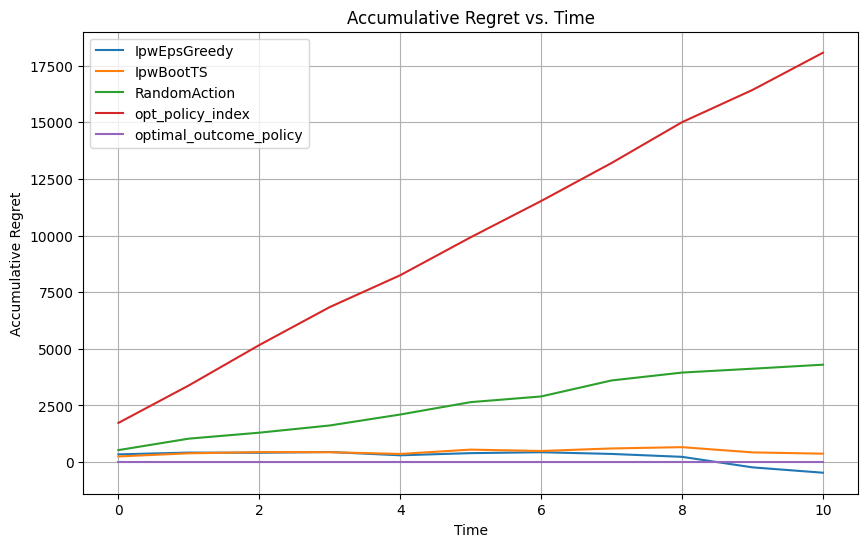

In [11]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


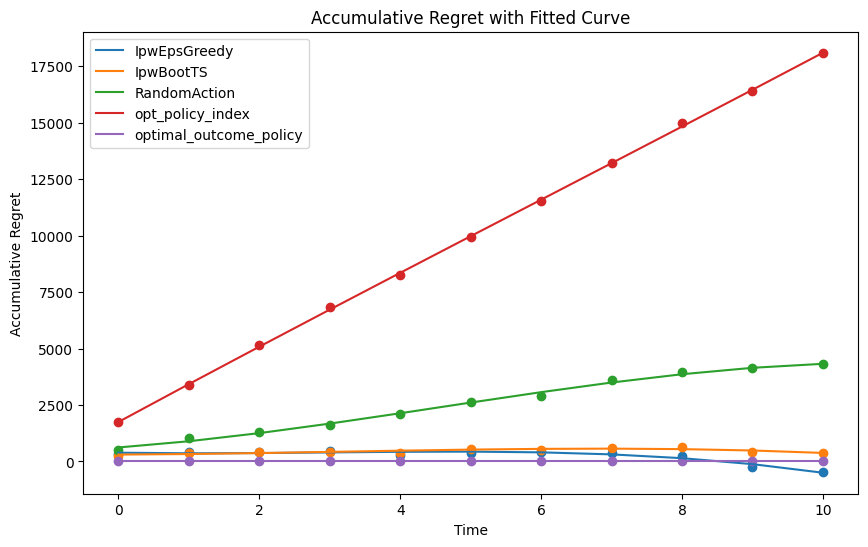

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
